In [1]:
from collections import Counter

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from matplotlib import pyplot as plt
import numpy as np

In [2]:
LABELS_PATH = '../../data/intermediate/images/training_labels.csv'
TRAIN_PATH = '../../data/intermediate/images/train.txt'
VALIDATION_PATH = '../../data/intermediate/images/validation.txt'

In [3]:
train_images = pd.read_csv(TRAIN_PATH, header=None)
validation_images = pd.read_csv(VALIDATION_PATH, header=None)
labels = pd.read_csv(LABELS_PATH)

In [4]:
label_map = {str(idx): label for idx, label in enumerate([l for l in labels.columns if l != 'Name'])}

In [5]:
y_train = labels[labels['Name'].isin(train_images[0].tolist())][[l for l in labels.columns if l != 'Name']]
y_validation = labels[labels['Name'].isin(validation_images[0].tolist())][[l for l in labels.columns if l != 'Name']]

In [6]:
df = pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train.to_numpy(), order=2) for combination in row),
    'validation' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_validation.to_numpy(), order=2) for combination in row)
}).fillna(0.0).reset_index()

In [7]:
df['index'] = df['index'].str.split(',', expand=False).apply(lambda x: f'({label_map[x[0].strip("(")]}, {label_map[x[1].strip(")").strip()]})')

In [8]:
df = df.set_index('index')

In [9]:
df['train'] = df['train'] / train_images.shape[0]
df['validation'] = df['validation'] / validation_images.shape[0]

In [10]:
df = df.sort_values(by=['train', 'validation'], ascending=False)

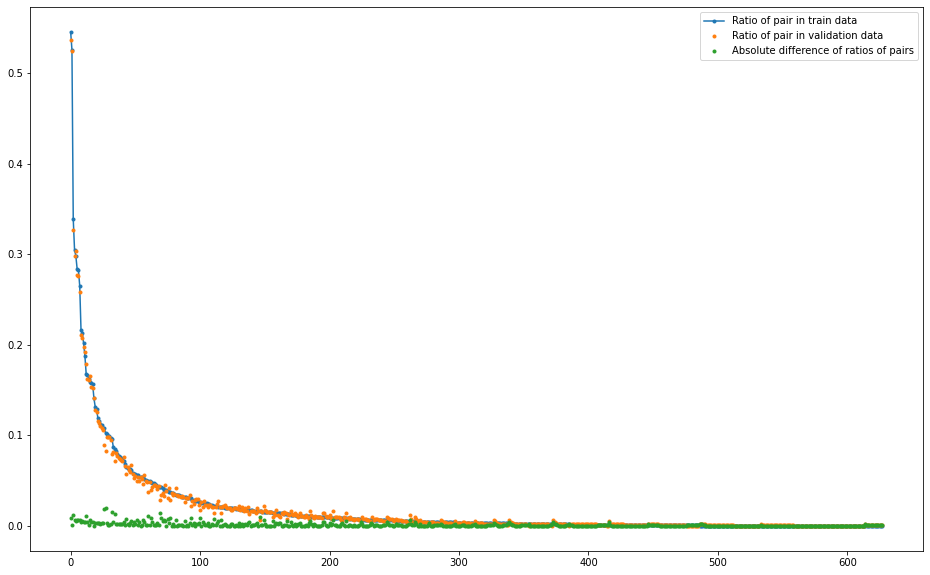

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))
line, = ax.plot(df['train'].values, marker='.')
line.set_label('Ratio of pair in train data')
line, = ax.plot(df['validation'].values, marker='.', linestyle='')
line.set_label('Ratio of pair in validation data')
line, = ax.plot(np.abs(df['train'].values - df['validation'].values), marker='.', linestyle='')
line.set_label('Absolute difference of ratios of pairs')
ax.legend()
plt.show()

In [12]:
df

train  validation
index                                                             
(Building, Building)                          0.545366    0.536190
(Trees, Trees)                                0.525528    0.524762
(Grass, Grass)                                0.338862    0.326667
(Building, Trees)                             0.305041    0.298095
(Windows, Windows)                            0.298211    0.303810
(Grass, Trees)                                0.283902    0.277143
(Plants, Plants)                              0.282927    0.276190
(Building, Windows)                           0.265041    0.258095
(Plants, Trees)                               0.216260    0.211429
(Person, Person)                              0.213333    0.207619
(Building, Grass)                             0.201951    0.197143
(Footpath, Footpath)                          0.187967    0.192381
(Church, Church)                              0.167805    0.179048
(Trees, Windows)                              0.166504    0.161905
(Grass, Plants)                               0.162602    0.160952
(Road, Road)                                  0.159350    0.165714
(Building, Plants)                            0.157724    0.153333
(Building, Footpath)                          0.156423    0.152381
(Cross, Cross)                                0.140813    0.140952
(Building, Road)                              0.131382    0.127619
(Footpath, Trees)                             0.129106    0.125714
(Church, Cross)                               0.119350    0.116190
(Grass, Windows)                              0.116423    0.113333
(Road, Trees)                                 0.113171    0.110476
(Building, Church)                            0.111545    0.108571
(Forest, Forest)                              0.108618    0.105714
(Footpath, Windows)                           0.108618    0.089524
(Building, Cross)                             0.102439    0.082857
(Building, Person)                            0.101138    0.098095
(Church, Trees)                               0.099837    0.098095
(Plants, Windows)                             0.099187    0.098095
(Forest, Trees)                               0.097561    0.095238
(Cross, Trees)                                0.095935    0.080000
(Road, Windows)                               0.086829    0.081905
(Footpath, Grass)                             0.084878    0.071429
(Person, Trees)                               0.082927    0.080952
(Motor vehicle, Motor vehicle)                0.079350    0.077143
(Footpath, Road)                              0.077724    0.075238
(Landscape, Landscape)                        0.076098    0.074286
(Furniture, Furniture)                        0.075122    0.073333
(Museum, Museum)                              0.074472    0.072381
(City, City)                                  0.071545    0.076190
(Footpath, Plants)                            0.068293    0.066667
(Building, Motor vehicle)                     0.065366    0.057143
(Landscape, Trees)                            0.063740    0.065714
(Building, City)                              0.063089    0.061905
(Grass, Road)                                 0.063089    0.060000
(Stairs, Stairs)                              0.062114    0.067619
(Forest, Grass)                               0.058862    0.057143
(Plants, Road)                                0.057561    0.053333
(Cultural institution, Cultural institution)  0.057236    0.055238
(Cross, Grass)                                0.056260    0.049524
(Person, Windows)                             0.055935    0.054286
(Church, Grass)                               0.054309    0.049524
(Rocks, Rocks)                                0.053984    0.054286
(Church, Windows)                             0.053659    0.052381
(Forest, Plants)                              0.053659    0.046667
(Bench, Bench)                                0.051707    0.056190
(Building, Stairs)           